# Fake News Detection

## Authors

1. Ida Chepng'eno
2. George Mbugua
3. Kevan Ndwiga
4. Daniel Muruthi
5. Mike Kiptoch
6. Neville Ngenzi



## 1. BUSINESS UNDERSTANDING

As a leading news organization in Kenya, Tuko News faces the formidable challenge of combating fake news to uphold journalistic integrity and maintain public trust. The dissemination of fake news poses substantial risks to Tuko News, including erosion of reader confidence, polarization of public opinion, and potential legal ramifications. To address these challenges, Tuko News recognizes the urgent need for sophisticated systems capable of detecting and flagging fake news in real-time. By implementing robust fake news detection mechanisms, Tuko News aims to safeguard its reputation, enhance public trust, and ensure the dissemination of accurate and reliable information.


### a. Introduction

In today's digital age, the spread of misinformation, commonly known as fake news, has become a pervasive issue, undermining the integrity of journalistic organizations worldwide. Tuko News, as a leading news organization in Kenya, recognizes the gravity of this challenge and aims to address it proactively. Through the implementation of advanced technologies and rigorous methodologies, Tuko News seeks to combat the dissemination of fake news and uphold its commitment to journalistic integrity and public trust.

### b. Problem Statement

#### What is the prevailing Circumstance?

The proliferation of social media platforms and digital news outlets has facilitated the rapid dissemination of information, both accurate and false. This unprecedented accessibility to news sources has led to an alarming increase in the circulation of fake news, which poses significant risks to Tuko News and its stakeholders.

#### What problem is being addressed?

The primary problem being addressed is the pervasive presence of fake news within the digital media landscape. Fake news undermines the credibility of Tuko News as a reputable journalistic entity, erodes reader confidence, and contributes to the polarization of public opinion. Moreover, the dissemination of false information can have far-reaching consequences, including social unrest, political instability, and legal ramifications.

#### How the project aims to solve the problems?

The project aims to develop and implement sophisticated systems for detecting and flagging fake news in real-time. By leveraging cutting-edge technologies such as natural language processing (NLP), machine learning (ML), and data analytics, Tuko News intends to identify and verify the authenticity of news articles and sources. Additionally, the project will involve the establishment of rigorous editorial standards and fact-checking procedures to ensure the dissemination of accurate and reliable information to its audience. Through these initiatives, Tuko News seeks to safeguard its reputation, enhance public trust, and uphold the principles of ethical journalism.



### c. Objectives

#### Main Objectives

To implement robust fake news detection mechanisms capable of identifying and flagging misinformation in real-time, thereby safeguarding the integrity and credibility of Tuko News.

#### Specific Objectives

1. Develop a comprehensive dataset of labeled news articles, encompassing both genuine and fake content, to train and validate machine learning models for fake news detection.
2. Utilize natural language processing (NLP) techniques to extract relevant features from news articles, such as linguistic patterns, sentiment analysis, and lexical semantics.
3. Implement state-of-the-art machine learning algorithms, including supervised and unsupervised learning approaches, to classify news articles as genuine or fake based on extracted features.
4. Integrate the fake news detection system seamlessly into Tuko News's content management workflow, enabling automated flagging and verification of potentially false information.
5. Establish a framework for continuous monitoring and evaluation of the fake news detection system's performance, including metrics such as precision, recall, and F1 score.
6. Conduct regular updates and improvements to the fake news detection system to adapt to evolving misinformation tactics and enhance its accuracy and reliability over time.


### d. Notebook Structure




### e. Stakeholders




### f. Metric of Success





## 2. Data Understanding

The dataset comprises two CSV files: "Fake.csv" and "True.csv", sourced from Kaggle each contain 20,000 rows. Columns include 'title', 'text', 'subject', and 'date'
Each file contains news articles, distinguished by their authenticity. 'Fake.csv' contains fake news articles, while 'True.csv' contains genuine news articles.


Title Column:
Offers succinct summaries of news article content.
Crucial for headline analysis and understanding key themes. 
Text Column:
Contains full textual content of the news articles.
Provides detailed information for NLP tasks such as sentiment analysis and text classification. 
Subject Column:
Categorizes news articles into specific subjects or domains.
Enables filtering and analysis based on topics of interest.
Date Column:
Records publication dates of news articles.
Facilitates temporal analysis and trend tracking.



### Import Libraries

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string


### Loading The Datasets

In [112]:
# Loading the true_news dataset

true_news = pd.read_csv('True.csv')
true_news.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [113]:
# Loading the fake_news dataset

fake_news = pd.read_csv('Fake.csv')
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [114]:
# Printing the shape of each DataFrame

print("Shape of true_news dataset:", true_news.shape)
print("Shape of fake_news dataset:", fake_news.shape)

Shape of true_news dataset: (21417, 4)
Shape of fake_news dataset: (23481, 4)


In [115]:
# Printing the info of each DataFrame

print("Info of true_news dataset:")
print(true_news.info())

print("\nInfo of fake_news dataset:")
print(fake_news.info())

Info of true_news dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None

Info of fake_news dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [116]:
# Checking the column names of true_news dataset
print("Column names of true_news dataset:")
print(list(true_news.columns))

# Checking the column names of fake_news dataset
print("\nColumn names of fake_news dataset:")
print(list(fake_news.columns))

Column names of true_news dataset:
['title', 'text', 'subject', 'date']

Column names of fake_news dataset:
['title', 'text', 'subject', 'date']


In [117]:
# Checking the sum of missing values 
print("Missing values in the True news dataset:\n", true_news.isnull().any())
print("Missing values in the Fake news dataset:\n", fake_news.isnull().any())


Missing values in the True news dataset:
 title      False
text       False
subject    False
date       False
dtype: bool
Missing values in the Fake news dataset:
 title      False
text       False
subject    False
date       False
dtype: bool


#### Assigning Classes to the Dataset

In [118]:
fake_news['class'] = 0
true_news['class'] = 1



In [119]:
# Printing value counts for the 'subject' column in the true_news dataset
print("Value counts for 'subject' column in the true_news dataset:")
print(true_news['subject'].value_counts())

# Printing value counts for the 'subject' column in the fake_news dataset
print("\nValue counts for 'subject' column in the fake_news dataset:")
print(fake_news['subject'].value_counts())

Value counts for 'subject' column in the true_news dataset:
subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

Value counts for 'subject' column in the fake_news dataset:
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


# Exploratory Data Analysis

### Distribution of Subject Column

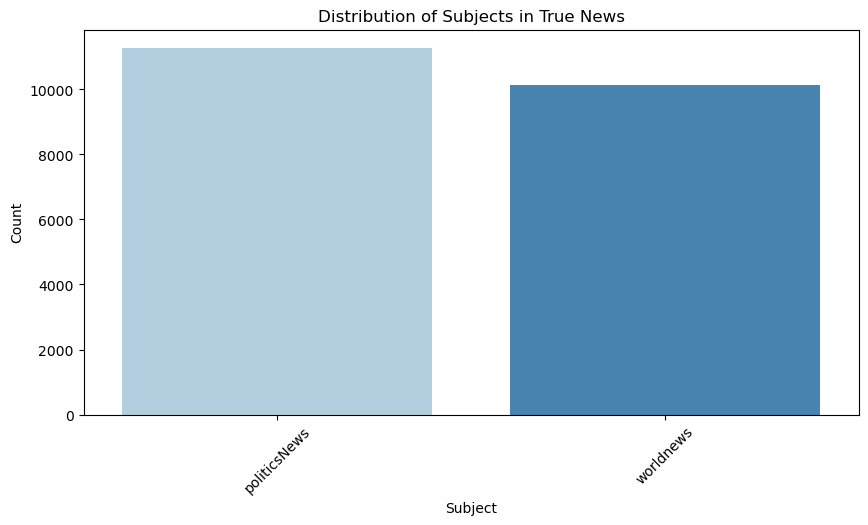

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the distribution of 'subject' in both datasets
true_subject_counts = true_news['subject'].value_counts()
fake_subject_counts = fake_news['subject'].value_counts()

# Plot the distribution for true news
plt.figure(figsize=(10, 5))
sns.barplot(x=true_subject_counts.index, y=true_subject_counts.values, palette='Blues')
plt.title('Distribution of Subjects in True News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


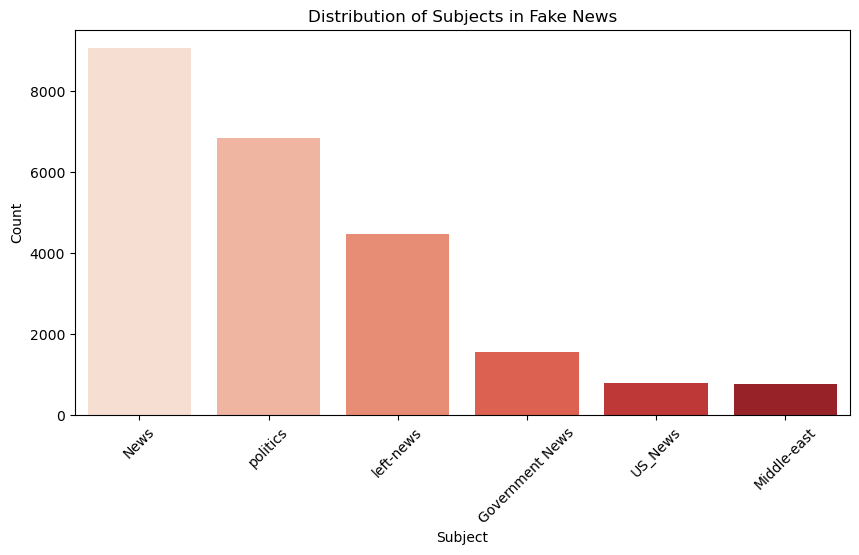

In [121]:

# Plot the distribution for fake news
plt.figure(figsize=(10, 5))
sns.barplot(x=fake_subject_counts.index, y=fake_subject_counts.values, palette='Reds')
plt.title('Distribution of Subjects in Fake News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- These bar plots illustrate the distribution of subjects in both true and fake news datasets. This can help identify which subjects are more common in each dataset and whether there's a notable difference.

### Analysis of Article Length (Word Count)


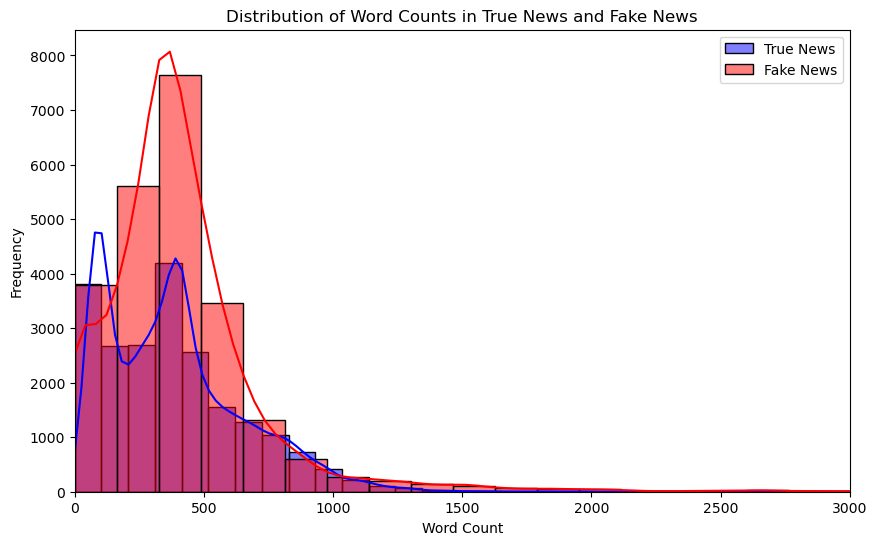

In [122]:

# Calculate word counts for both datasets
true_news['word_count'] = true_news['text'].apply(lambda x: len(x.split()))
fake_news['word_count'] = fake_news['text'].apply(lambda x: len(x.split()))

# Create a single plot with histograms for both datasets, limited to word counts up to 3,000
plt.figure(figsize=(10, 6))
sns.histplot(data=true_news, x='word_count', kde=True, color='blue', alpha=0.5, label='True News', bins=50)
sns.histplot(data=fake_news, x='word_count', kde=True, color='red', alpha=0.5, label='Fake News', bins=50)

# Set titles and labels
plt.title('Distribution of Word Counts in True News and Fake News' )
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Set the x-axis limit to 3,000
plt.xlim(0, 3000)

# Add a legend
plt.legend()

# Show the plot
plt.show()


- This  aims to visually compare the distribution of word counts between true and fake news datasets.

### Investigate Relationships between Subject and Class

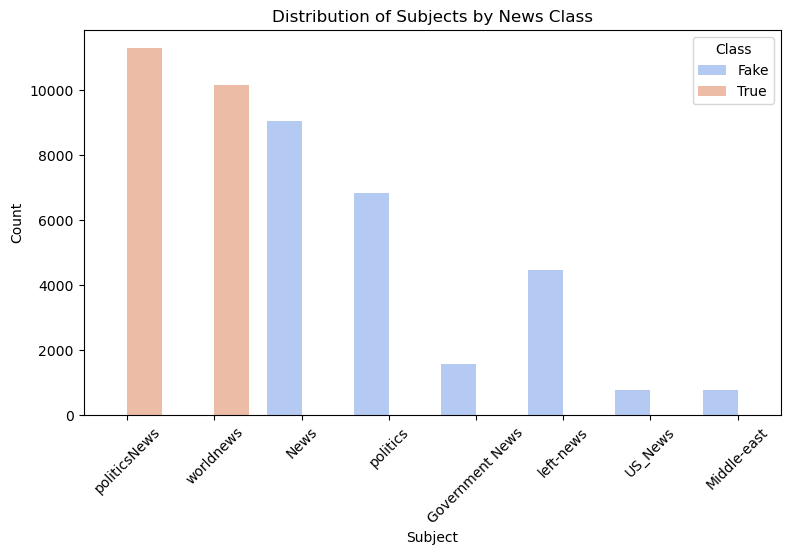

In [123]:

# Concatenate the true and fake news datasets
combined_data = pd.concat([true_news, fake_news])

# Plot the relationship between 'subject' and 'class' using count plot
plt.figure(figsize=(9, 5))
sns.countplot(data=combined_data, x='subject', hue='class', palette='coolwarm')
plt.title("Distribution of Subjects by News Class")
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Fake', 'True'])
plt.show()


- This aims to visually represent the distribution of subjects in the combined dataset, categorized by their respective news class (true or fake).

### Text Preprocessing

 - Text processing helps to prepare the text data for further analysis or modeling by cleaning it and reducing each word to its base form through stemming or lemmatization.

#### 1) Tokenizing and Cleaning the Text

In [138]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk

nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(string.digits)

    # Remove specific quotation marks and other punctuation
    text = text.replace("'", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace('"', "")
    text = text.replace('“', "")
    text = text.replace('”', "")

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]
   
        # Join the words back into a string
    text = ' '.join(words)

    return text

true_news['text'] = true_news['text'].apply(preprocess_text)
fake_news['text'] = fake_news['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



- This is to Ensure that the text has been cleaned and pre-processed, removing punctuation, stopwords, and converting the text to lowercase. 

In [139]:
# Tokenize and remove stop words for true news
true_tokens = [word for text in true_news['text'] for word in text.split() if word not in stop_words]

# Tokenize and remove stop words for fake news
fake_tokens = [word for text in fake_news['text'] for word in text.split() if word not in stop_words]

# Create word frequency counters
from collections import Counter

true_word_count = Counter(true_tokens)
fake_word_count = Counter(fake_tokens)

# Most common words in each dataset
most_common_true = true_word_count.most_common(20)  # Top 20 words in true news
most_common_fake = fake_word_count.most_common(20)  # Top 20 words in fake news

- This code segment is useful for analyzing and comparing the frequency of occurrence of words in both true and fake news datasets, which can provide insights into the characteristics and content of the news articles in each category.

### Visualization: Word Clouds

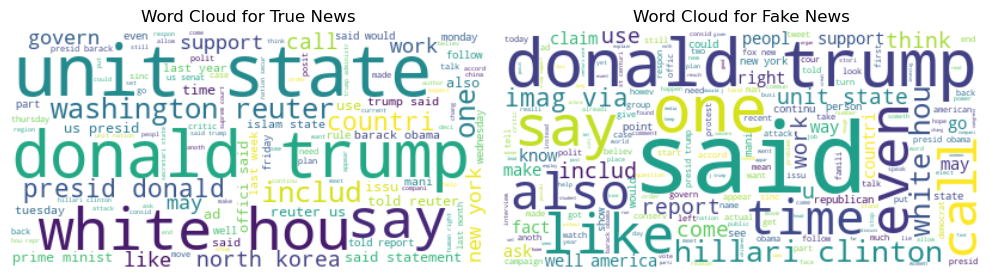

In [140]:
# Create a word cloud for true news
from wordcloud import WordCloud

wordcloud_true = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(true_tokens))

# Create a word cloud for fake news
wordcloud_fake = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(fake_tokens))

# Plot word clouds
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for True News')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')

plt.tight_layout()
plt.show()


- This code segment provides a visual representation of the most frequent words in both true and fake news datasets through word clouds, allowing for quick insights into the prevalent themes or topics within each category.

#### Most Common Words in True News And Fake News

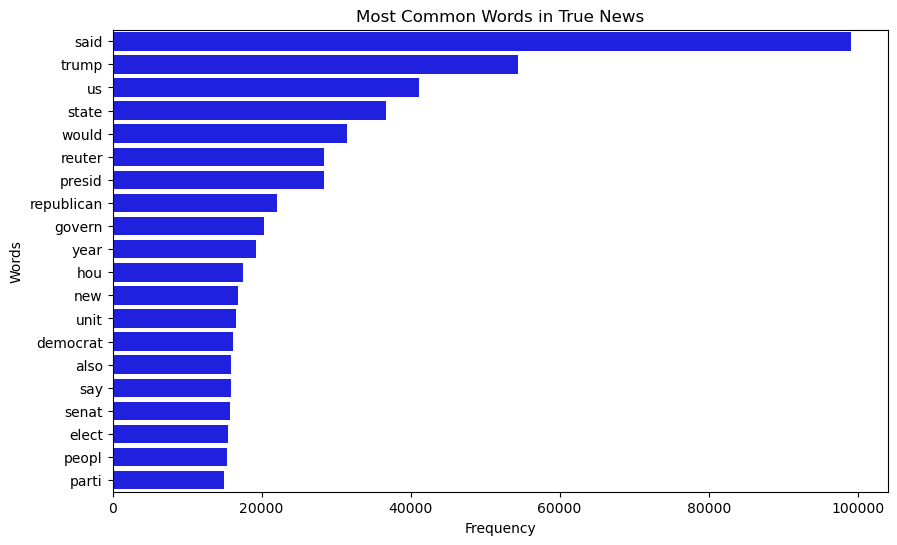

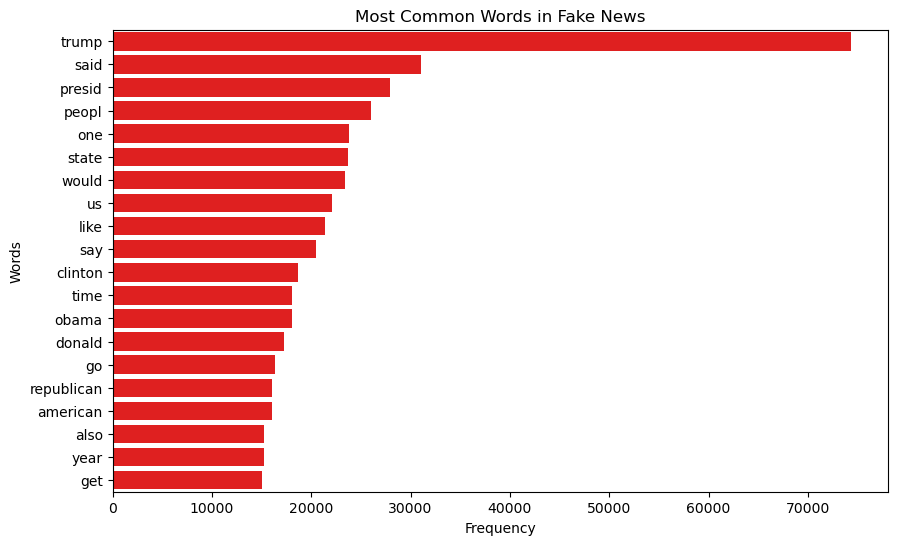

In [141]:
# Create bar plots for the most common words in true news
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in most_common_true], y=[x[0] for x in most_common_true], color='blue')
plt.title('Most Common Words in True News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Create bar plots for the most common words in fake news
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in most_common_fake], y=[x[0] for x in most_common_fake], color='red')
plt.title('Most Common Words in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


- As we can see, some of the most common words in both datasets are related to politics and Donald Trump. 
- However, there are some differences between the two datasets, with the fake news dataset containing more references to  Hillary Clinton and a greater use of words like “like”,“said”,“would”.

## Model Training